<a href="https://colab.research.google.com/github/Larissa1292/challenge_national_parks/blob/master/national_parks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hoje iremos falar sobre um dos desafios do "Tidytuesday", onde iremos construir o primeiro gráfico do artigo base "The National Parks Have Never Been More Popular" do famoso site [fivethirtyeight](https://fivethirtyeight.com/features/the-national-parks-have-never-been-more-popular/).

## Mas o que é o Tidytuesday?

É um projeto de dados semanal bem interessante voltado para o ambiente R. Toda terça-feira é lançado um projeto e para a realização dele, é disponibilizado o data set referente a esse desafio. Esse projeto nasceu do 'R4DS Online Learning Community' e do 'R for Data Science', com o objetivo de aprender como resumir e organizar dados para fazer gráficos significativos com os pacotes "ggplot2", "tidyr", "dplyr" e outras ferramentas no ambiente tidyverse. Ao realizar um desafio, eles pedem para compartilhar o código usado para gerar os resultados.

## Iniciando

Para dar início, precisamos instalar o pacote "Tidyverse" e para isso usamos o comando abaixo:

In [0]:
#install.packages("tidyverse") #instalando o pacote Tidyverse

Após instalar o pacote, precisamos carregá-lo para que possamos usar. Então utilizamos o comando "require()" para realizar essa função. Neste projeto, além do pacote "tidyverse", precisaremos do pacote "scales". 

In [0]:
require(tidyverse) #carregando o pacote Tidyverse
require(scales) #carregando o pacote 'scales' para definir a escala do gráfico

Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: scales

Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor



## Lendo os bancos de dados que serão utilizados


In [0]:
park_visits <- readr::read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-09-17/national_parks.csv")
state_pop <- readr::read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-09-17/state_pop.csv")
gas_price <- readr::read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-09-17/gas_price.csv")

Parsed with column specification:
cols(
  year = col_character(),
  gnis_id = col_character(),
  geometry = col_character(),
  metadata = col_character(),
  number_of_records = col_double(),
  parkname = col_character(),
  region = col_character(),
  state = col_character(),
  unit_code = col_character(),
  unit_name = col_character(),
  unit_type = col_character(),
  visitors = col_double()
)
Parsed with column specification:
cols(
  year = col_double(),
  state = col_character(),
  pop = col_double()
)
Parsed with column specification:
cols(
  year = col_double(),
  gas_current = col_double(),
  gas_constant = col_double()
)


Como o data set é muito grande, podemos ter uma visualização rápida do início do data set usando a função "head()" ou do final do data set com a função "tail()".

In [0]:
head(park_visits) #visualizando o início do dataset
tail(park_visits) #visualizando o final do dataset

year,gnis_id,geometry,metadata,number_of_records,parkname,region,state,unit_code,unit_name,unit_type,visitors
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1904,1163670,POLYGON,NA,1,Crater Lake,PW,OR,CRLA,Crater Lake National Park,National Park,1500
1941,1531834,MULTIPOLYGON,NA,1,Lake Roosevelt,PW,WA,LARO,Lake Roosevelt National Recreation Area,National Recreation Area,0
1961,2055170,MULTIPOLYGON,NA,1,Lewis and Clark,PW,WA,LEWI,Lewis and Clark National Historical Park,National Historical Park,69000
1935,1530459,MULTIPOLYGON,NA,1,Olympic,PW,WA,OLYM,Olympic National Park,National Park,2200
1982,277263,POLYGON,NA,1,Santa Monica Mountains,PW,CA,SAMO,Santa Monica Mountains National Recreation Area,National Recreation Area,468144
1919,578853,MULTIPOLYGON,NA,1,NA,NE,ME,ACAD,Acadia National Park,National Park,64000


year,gnis_id,geometry,metadata,number_of_records,parkname,region,state,unit_code,unit_name,unit_type,visitors
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1906,1263056,MULTIPOLYGON,http://nrdata.nps.gov/programs/Lands/WICA_metadata.xml,1,Wind Cave,MW,SD,WICA,Wind Cave National Park,National Park,2787
1905,1163670,POLYGON,NA,1,Crater Lake,PW,OR,CRLA,Crater Lake National Park,National Park,1400
1905,1609331,POLYGON,http://nrdata.nps.gov/programs/Lands/YELL_metadata.xml,1,Yellowstone,IM,WY,YELL,Yellowstone National Park,National Park,26188
1905,255948,MULTIPOLYGON,http://nrdata.nps.gov/programs/Lands/KICA_metadata.xml,1,Kings Canyon,PW,CA,KICA,Kings Canyon National Park,National Park,1000
1905,1528416,MULTIPOLYGON,http://nrdata.nps.gov/programs/Lands/MORA_metadata.xml,1,Mount Rainier,PW,WA,MORA,Mount Rainier National Park,National Park,928
1905,1263056,MULTIPOLYGON,http://nrdata.nps.gov/programs/Lands/WICA_metadata.xml,1,Wind Cave,MW,SD,WICA,Wind Cave National Park,National Park,2438


In [0]:
unique(park_visits$unit_type)
# unique(park_visits$unit_name)

[1] "National Park"                        
 [2] "National Recreation Area"             
 [3] "National Historical Park"             
 [4] "National Seashore"                    
 [5] "National Preserve"                    
 [6] "National River and Recreation Area"   
 [7] "Parkway"                              
 [8] "National Scenic River"                
 [9] "National Military Park"               
[10] "National Monument"                    
[11] "National Historic Site"               
[12] "National Recreation River"            
[13] "National River"                       
[14] "Wild and Scenic River"                
[15] "Park"                                 
[16] "National Battlefield"                 
[17] "National Lakeshore"                   
[18] "Ecological and Historic Preserve"     
[19] "National Battlefield Park"            
[20] "National Memorial"                    
[21] "Other Designation"                    
[22] "National Battlefield Site"            
[23] "National Parkway"                     
[24] "National Historical Park and Preserve"
[25] "National Reserve"                     
[26] "National Scenic Riverway"             
[27] "War in the Pacific"                   
[28] "Scenic and Recreational River"        
[29] "International Historic Site"          
[30] "Valles Caldera National Preserve"

In [0]:
head(state_pop) #visualizando o início do dataset

year,state,pop
<dbl>,<chr>,<dbl>
1900,AL,1830000
1901,AL,1907000
1902,AL,1935000
1903,AL,1957000
1904,AL,1978000
1905,AL,2012000


In [0]:
head(gas_price) #visualizando o início do dataset

year,gas_current,gas_constant
<dbl>,<dbl>,<dbl>
1929,0.21,2.38
1930,0.20,2.30
1931,0.17,2.18
1932,0.18,2.61
1933,0.18,2.66
1934,0.19,2.67


### OBS: Ao chamar o pacote "tidyverse", já teremos disponíveis os dois pacotes que iremos utilizar: dplyr e ggplot2. O pacote "dplyr" é voltado para manipulação dos dados e o pacote "ggplot2" é voltado para criar gráficos.

## Vamos criar um gráfico para visualizar o número de visitas nos parques, por ano.



#### Primeiro precisamos selecionar as variáveis de interesse. Para isso, vamos selecionar as var. "year" e "visitors"; depois iremos calcular o número total de visitantes por ano.

Aqui utilizaremos algumas das funções mais importantes do pacote dplyr, que foi explicado no post... e iremos armazenar o resultado em um novo data set chamado 'visitors_year'.

In [0]:
visitors_year <- park_visits %>%
                    select(year, visitors) %>%
                    group_by(year) %>%
                    summarise(total_visit = sum(visitors, na.rm = TRUE))

In [0]:
head(visitors_year)

year,total_visit
<chr>,<dbl>
1904,120690
1905,140954
1906,30569
1907,32935
1908,42768
1909,60899


In [0]:
glimpse(visitors_year) #visualizando o tipo das variáveis

Observations: 114
Variables: 2
$ year        <chr> "1904", "1905", "1906", "1907", "1908", "1909", "1910", "…
$ total_visit <dbl> 120690, 140954, 30569, 32935, 42768, 60899, 173416, 19420…


#### Agora iremos plotar o gráfico, a partir do novo dataset "visitors_year":

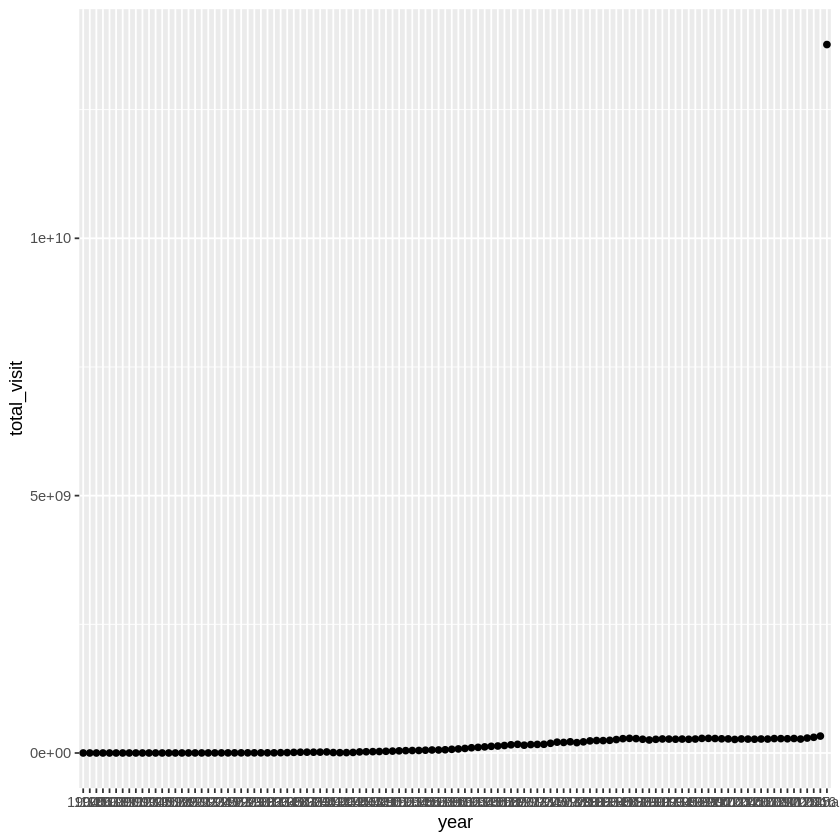

In [0]:
ggplot(visitors_year, aes(x = year, y = total_visit)) +
  geom_point()

In [0]:
visitors_year <- visitors_year %>% ungroup() #armazenando as observações desagrupadas

In [0]:
head(visitors_year)

year,total_visit
<chr>,<dbl>
1904,120690
1905,140954
1906,30569
1907,32935
1908,42768
1909,60899


#### Ao observar o gráfico, podemos ver que tem uma informação que é muito discrepante da massa de dados. Para isso, precisamos investigar o porquê isso acontece. 
Para isso, vamos utilizar a função "unique()" na variável "year", que irá mostrar cada observação sem repetição. 

In [0]:
unique(park_visits$year)

[1] "1904"  "1941"  "1961"  "1935"  "1982"  "1919"  "1969"  "1967"  "1944" 
 [10] "1989"  "1988"  "1993"  "1955"  "1976"  "1980"  "1934"  "1951"  "1925" 
 [19] "1948"  "1931"  "1940"  "1971"  "1979"  "2011"  "2004"  "1968"  "1984" 
 [28] "1987"  "1985"  "1973"  "1936"  "1992"  "1920"  "1991"  "1957"  "1964" 
 [37] "1937"  "1966"  "1974"  "1995"  "1962"  "1929"  "1997"  "1950"  "1942" 
 [46] "1956"  "1972"  "1970"  "2000"  "1933"  "1924"  "1921"  "2010"  "1978" 
 [55] "1975"  "1906"  "1996"  "2003"  "2006"  "1947"  "2002"  "1908"  "1965" 
 [64] "1939"  "1960"  "1938"  "1963"  "2001"  "1954"  "1958"  "2013"  "1981" 
 [73] "1952"  "1923"  "1983"  "2016"  "1998"  "2007"  "2015"  "1915"  "1911" 
 [82] "1917"  "Total" "1930"  "1932"  "1922"  "1926"  "1986"  "1990"  "2014" 
 [91] "1994"  "2012"  "1977"  "2009"  "2008"  "2005"  "1999"  "1959"  "1946" 
[100] "1945"  "1953"  "1943"  "1949"  "1928"  "1927"  "1918"  "1916"  "1914" 
[109] "1913"  "1912"  "1910"  "1909"  "1905"  "1907"

Aqui a função "unique()" mostra todos os anos presentes no data set, mas sem repetição. Então observamos existe uma observação "Total". Essa observação está presente no data set original e contabiliza o número total de visitas no período.

#### Agora iremos retirar do banco a observação "Total" e iremos aproveitar para filtar a variável "unit_type" que tem a nomenclatura "National Park":

In [0]:
visitors_year <- park_visits %>%
  select(year, visitors, unit_type)%>%
  filter(year != "Total", 
         str_detect(unit_type, "National Park$"), visitors > 0
        ) %>%
  group_by(year) %>%
  summarise(total_visit = sum(visitors, na.rm = TRUE))


Fizemos um filtro para retirar os dados referentes ao "Total" dentro da variável "year". Depois disso, selecionamos todos os parques onde a variável "unit_type" é igual a "National Park". 

Para isso utilizamos a função **"str_detect()"** que tem como objetivo detectar a presença ou ausência de algum padrão dentro de uma string. A estrutura básica dessa função é a seguinte:

**str_detect(string, pattern)**

Onde: 

* string: é a variável que desejamos analisar; 
* pattern: é o padrão a ser buscado na string. 

O parâmetro **pattern** é utilizado com expressões regulares, que são formas robustas de identificar padrões de caracteres. Para uma breve explicação, [acesse aqui](https://rstudio.com/wp-content/uploads/2016/09/RegExCheatsheet.pdf).

No nosso caso, **string** é a variável "unit_type" e **patter** é "National Park". Note que utilizamos um '\$' ao final da palavra Park. Ao observar a variável "unit_type" dentro do data set "park_visits" existem nomenclaturas com "Park" e também com"Parkway". Então para garantir que iremos pegar apenas os nomes iguais a "National Park", utilizamos o '\$' para mostrar que queremos exatamente essa nomenclatura.

In [0]:
unique(park_visits$unit_type)
head(visitors_year)

[1] "National Park"                        
 [2] "National Recreation Area"             
 [3] "National Historical Park"             
 [4] "National Seashore"                    
 [5] "National Preserve"                    
 [6] "National River and Recreation Area"   
 [7] "Parkway"                              
 [8] "National Scenic River"                
 [9] "National Military Park"               
[10] "National Monument"                    
[11] "National Historic Site"               
[12] "National Recreation River"            
[13] "National River"                       
[14] "Wild and Scenic River"                
[15] "Park"                                 
[16] "National Battlefield"                 
[17] "National Lakeshore"                   
[18] "Ecological and Historic Preserve"     
[19] "National Battlefield Park"            
[20] "National Memorial"                    
[21] "Other Designation"                    
[22] "National Battlefield Site"            
[23] "National Parkway"                     
[24] "National Historical Park and Preserve"
[25] "National Reserve"                     
[26] "National Scenic Riverway"             
[27] "War in the Pacific"                   
[28] "Scenic and Recreational River"        
[29] "International Historic Site"          
[30] "Valles Caldera National Preserve"

year,total_visit
<chr>,<dbl>
1904,120690
1905,140954
1906,30569
1907,32935
1908,42768
1909,60899


#### Com o dataset que iremos usar pronto, vamos criar algumas var. necessárias para usar no comando do gráfico:

Aqui, iremos criar os intervalos dos eixos X e Y para ficarem iguais ao gráfico que desejamos construir. Se não criarmos esses intervalos, o R irá criar automaticamente. 
* Então, para o eixo X vamos criar uma variável "breaks" que irá armazenar uma sequência que começa em 1910 e vai até 2010, com um intervalo de 10 unidades. Já a variável "labels" irá armazenar os valores (neste caso, não são números e sim caracteres) que irão aparecer na legenda do eixo X.

In [0]:
breaks <- seq(1910, 2010, by = 10) 
labels <- c("1910", "'20", "'30", "'40", "'50", "'60", "'70", "'80", "'90", "2000", "'10") #montando manualmente os ticks do eixo x

In [0]:
breaks
labels

[1] 1910 1920 1930 1940 1950 1960 1970 1980 1990 2000 2010

[1] "1910" "'20"  "'30"  "'40"  "'50"  "'60"  "'70"  "'80"  "'90"  "2000"
[11] "'10"

* Para o eixo Y, também iremos criar uma sequência para montar manualmente os valores que irão aparecer. A variável Y indica o número de visitas por ano. Então, na variável "labels" precisaremos ajustar a escala para milhão, então usaremos a função unit_format() do pacote "scales" (que carregamos no início do projeto) que nos permitirá ajustar essa escala. Para mais informações sobre esse pacote, [clique aqui](https://www.tidyverse.org/articles/2018/08/scales-1-0-0/).

In [0]:
breaks_y <- seq(0, max(visitors_year$total_visit), by = 20e+6) #criando uma sequência para montar os ticks do eixo y
labels_y <- unit_format(unit = "M",scale = 1e-6)(breaks_y) #montando os ticks do eixo y

In [0]:
breaks_y
labels_y

[1] 0e+00 2e+07 4e+07 6e+07 8e+07

[1] "0 M"  "20 M" "40 M" "60 M" "80 M"

## Plotando o Gráfico

Para plotar o gráfico precisamos em cada função do [pacote ggplot2](https://ggplot2.tidyverse.org/) especificar o que queremos.

* ggplot(): aqui especificamos o data set que iremos usar e quem são as variáveis x e y;
* geom_area(): definimos o tipo de gráfico, que neste caso é um gráfico com preenchimento de área;
* scale_x_discrete(): aqui iremos especificar os intervalos que montamos acima e as legendas ("breaks" e "labels");
* scale_y_continuous(): idem a função acima;
* labs(): aqui definimos o título e o sub-título do gráfico;
* theme(): usaremos essa função para retirar os títulos de cada eixo com os parâmetros **"axis.title.x = element_blank()"** e **"axis.title.y = element_blank()"**.

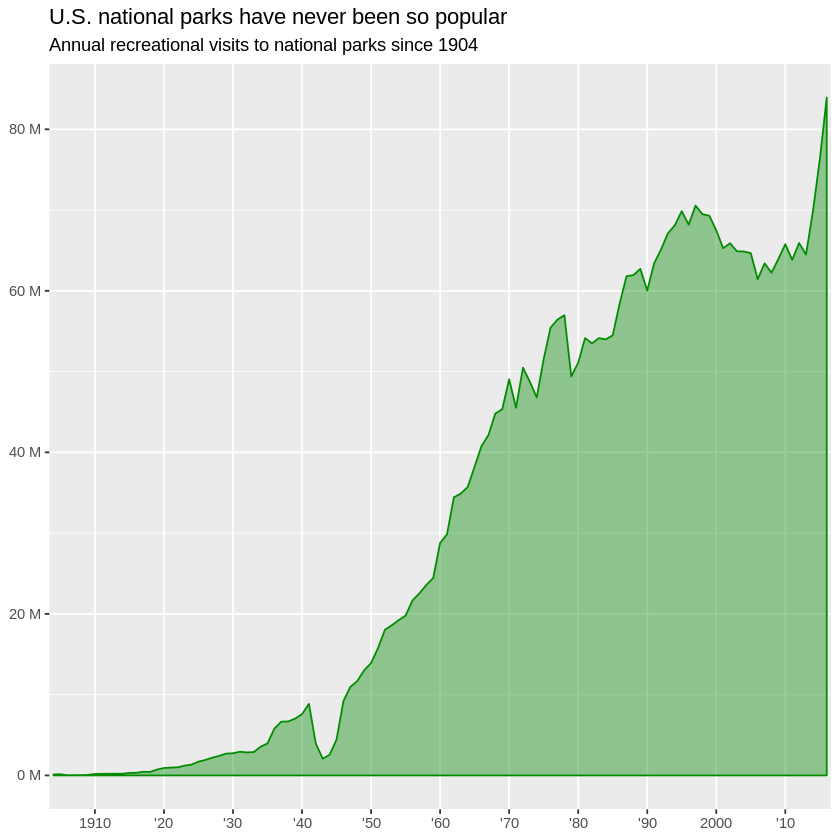

In [0]:
 ggplot(visitors_year, aes(x = year, y = total_visit, group = 1)) + #definindo o dataset e as var. de cada eixo (x,y)
  geom_area(color = "green4", fill = "green4", alpha = 0.4) + #gráfico com preenchimento de áerea
  scale_x_discrete(breaks = breaks, labels = labels) + #definindo os ticks do eixo x
  scale_y_continuous(breaks = breaks_y, labels = labels_y) + #definindo os ticks do eixo y
  labs(title = "U.S. national parks have never been so popular", 
       subtitle = "Annual recreational visits to national parks since 1904") + #escrevendo o título e subt-título
  theme(axis.title.x = element_blank(), axis.title.y = element_blank()) #retirando o título de cada eixo
  

## Pronto! Aqui temos o gráfico que nos propomos a construir! :D